### Load cleaned data and pre-defined classes

In [138]:
from data_clean import Data_to_Clean,Data_to_Analyze
import pickle
import pandas as pd
import copy
import json
from tqdm.auto import tqdm
tqdm.pandas()

MBTI_types=[
    'istj', 'isfj', 'infj', 'intj', 
    'istp', 'isfp', 'infp', 'intp', 
    'estp', 'esfp', 'enfp', 'entp', 
    'estj', 'esfj', 'enfj', 'entj'
    ]
cleaned_data={T:None for T in MBTI_types}

for type in cleaned_data.keys():
    file_path=f"Data\\cleaned_data\\{type}_cleaned.pkl" 
    try:
        with open(file_path, 'rb') as f:
            cleaned_data[type] = pickle.load(f)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except pickle.UnpicklingError:
        print(f"Error: Could not unpickle the file {file_path}. It might be corrupted or not a valid pickle file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

extra_data={}

for T in MBTI_types:
    file_path=f"Data\\cleaned_data\\extra\\{T}_extra.pkl"
    try:
        with open(file_path, 'rb') as f:
            extra_data[T] = pickle.load(f)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")

In [139]:
infp=cleaned_data["infp"]
infp.data.loc[0,"posts"]

['forest',
 'elizabeth',
 'holly',
 'fuss',
 'fly',
 'seat',
 'pant',
 'best',
 'friend',
 'son',
 'day',
 'yes',
 'marry',
 'decoration',
 'flower',
 'old',
 'deal',
 'day',
 'list',
 'couple',
 'change',
 'easy',
 'thread',
 'present',
 'guess',
 'b',
 'incidentally',
 'word',
 'commonly',
 'gahenna',
 'ancient',
 'greek',
 'trash',
 'dump',
 'b',
 'set',
 'free',
 'yes',
 'albuquerque',
 'hometown',
 'fiesta',
 'trip',
 'worth',
 'chapter',
 'book',
 'acceptable',
 'commit',
 'book',
 'kid',
 'bring',
 'present',
 'ha',
 'boston',
 'creme',
 'donut',
 'soon',
 'hope',
 'celebrate',
 'birthday',
 'mind',
 'world',
 'cake',
 'donut',
 'kid',
 'hugo',
 'goat',
 'dog',
 'enjoy',
 'ray',
 'day',
 'anxiety',
 'sit',
 's',
 'sky',
 'wait',
 'sunset',
 'sre',
 'warm',
 'self',
 'criticism',
 'breathing',
 'meditation',
 'care',
 'time',
 'time',
 'way',
 'fine',
 'people',
 'appalachian',
 'healing',
 'recovery',
 'start',
 'relax',
 'home',
 'knit',
 'sweater',
 't',
 'creature',
 'best',


### Visualize VADER score of all MBTI types

In [140]:
mbti_identities={
    T:{
        k:cleaned_data[T].basic_identities[k]
        for k in [
        "ave_sentence_quantity",
        "ave_word_count",
        "ave_upper_ratio",
        "ave_reading_ease",
        "ave_GF_index"
        ]
    }
    for T in MBTI_types
}
mbti_identities=pd.DataFrame(mbti_identities).T
mbti_identities

,ave_sentence_quantity,ave_word_count,ave_upper_ratio,ave_reading_ease,ave_GF_index
istj,140.922780,1584.861004,0.125113,53.508301,16.561120
isfj,139.890110,1542.766484,0.139261,58.487995,14.762555
infj,136.120151,1662.837275,0.108945,59.505421,14.098761
intj,142.160051,1768.897567,0.111903,55.228515,15.652458
istp,142.599388,1439.327217,0.135959,50.868624,18.008930
isfp,138.239782,1468.850136,0.147333,51.682698,17.722262
infp,135.311232,1538.657566,0.133015,54.009626,16.649938
intp,138.747226,1557.081381,0.124319,50.273724,18.050296
estp,138.510000,1528.890000,0.144286,54.100900,16.754100
esfp,147.137931,1500.454023,0.157108,54.208218,16.571782


In [141]:
all_vader_scores={T:cleaned_data[T].basic_identities["overall_vader_score"] for T in MBTI_types}

In [142]:
all_vader_scores=pd.DataFrame(all_vader_scores).T

In [143]:
all_vader_scores=all_vader_scores.sort_values(by="compound",ascending=False)
all_vader_scores

,neg,neu,pos,compound
isfj,0.074714,0.706432,0.179305,0.156459
infj,0.077386,0.706724,0.171925,0.146350
enfj,0.077268,0.706996,0.172352,0.146079
estj,0.075952,0.715335,0.168221,0.135310
esfj,0.079053,0.708754,0.163387,0.126369
enfp,0.081753,0.717179,0.163048,0.125133
intj,0.078297,0.723588,0.157496,0.117230
infp,0.086349,0.708721,0.163746,0.113087
isfp,0.086260,0.709435,0.164908,0.108508
entj,0.082541,0.718532,0.157704,0.106751


In [144]:
all_vader_scores["compound"].describe()

count    16.000000
mean      0.113410
std       0.024352
min       0.076574
25%       0.093851
50%       0.110797
75%       0.128604
max       0.156459
Name: compound, dtype: float64

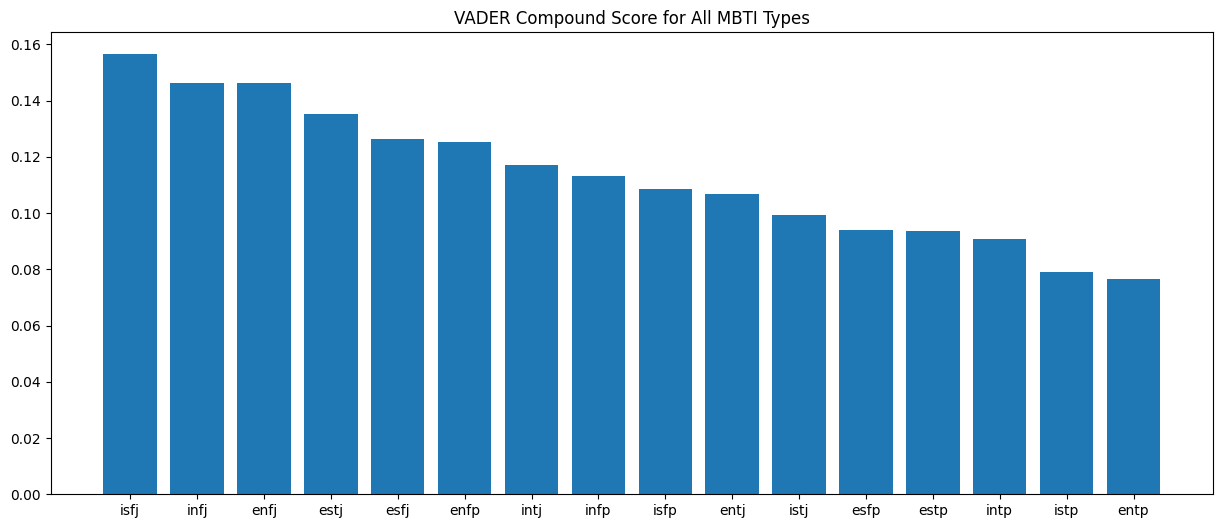

In [145]:
import matplotlib.pyplot as plt
x=all_vader_scores.index
y=all_vader_scores["compound"]
plt.figure(figsize=(15, 6))
plt.bar(x,y)
plt.title("VADER Compound Score for All MBTI Types")
plt.show()

In [146]:
# with open("Data/phrases.json",'r') as f:
#     phrases=json.load(f)
# phrases.keys()

In [147]:
# phrase_parts=set()
# for phrase in phrases.keys():
#     phrase_parts.update(phrase.split("_"))
# phrase_parts

### Construct a dictionary for LDA modeling

In [148]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
def constract_initial_dict(source,no_above,no_below):
    output = {T: {
        "corpus_overall": None,
        "corpus_specific": None,
        "original_text": [],
        "specific_initial_dict": None
    } for T in MBTI_types}
    
    output["all_original_text"]=[]
    for T in tqdm(MBTI_types):
        for i in source[T].data.index:
            temp=source[T].data.loc[i,"posts"]
            output[T]["original_text"].append(temp)
        output["all_original_text"].extend(output[T]["original_text"])
    with open("Data/all_original_text.pkl","wb") as f:
        pickle.dump(output["all_original_text"],f)
    output["overall_initial_dict"]=corpora.Dictionary(output["all_original_text"])
    output["overall_initial_dict"].filter_extremes(no_above=no_above,no_below=no_below)
    output["overall_initial_dict"].compactify()
    print("Size of dictionary:",len(output["overall_initial_dict"]))
    output["all_corpus"]=[output["overall_initial_dict"].doc2bow(post_token) for post_token in output["all_original_text"]]
    return output
initial_dict=constract_initial_dict(source=cleaned_data,
                                    no_above=0.2,
                                    no_below=50)
with open("Data/initial_dict.pkl",'wb') as f:
    pickle.dump(initial_dict,f)


  0%|          | 0/16 [00:00<?, ?it/s]

Size of dictionary: 5205


In [149]:
def check_corpus(corpus,dict,name=''):
    result=pd.DataFrame(
        [
            list(range(len(dict))),
            [0]*len(dict)
        ]
    ).T
    result.columns=["word","frequency"]
    for post in tqdm(corpus):
        for word_tuple in post:
            result.loc[word_tuple[0],"frequency"]+=word_tuple[1]
    for i in result.index:
        result.loc[i,"word"]=dict[i]
    result=result.sort_values(by="frequency",ascending=False)
    result.to_csv(f"Data/{name}id2word_result.csv")

In [150]:
check_corpus(initial_dict["all_corpus"],initial_dict["overall_initial_dict"])

  0%|          | 0/7811 [00:00<?, ?it/s]

C:\Users\DominicMin\AppData\Local\Temp\ipykernel_48160\1204166519.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'acct' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[i,"word"]=dict[i]


In [151]:
initial_dict["overall_initial_dict"][266]

'legend'

### Use LDA for topic modeling

In [152]:
with open("Data/initial_dict.pkl","rb") as f:
    initial_dict=pickle.load(f)
import gensim.corpora as corpora
import gensim
from gensim.models import LdaMulticore,CoherenceModel

def optimize_topic_num(
  start,
  end,
  step,
  dict=initial_dict["overall_initial_dict"],
  corpus=initial_dict["all_corpus"],
  text=initial_dict["all_original_text"]      
):
  output=pd.Series({},dtype=float)
  topic_num_range = range(start, end+1, step)
  for topic_num in tqdm(topic_num_range, desc="计算全局模型主题数"):
  # 训练 LDA 模型 (在所有帖子数据上)
    temp_lda_model = LdaMulticore(
        corpus=corpus,    # 使用所有帖子的词袋语料
        id2word=dict,         # 使用全局词典
        num_topics=topic_num,
        random_state=100,
        chunksize=2603,
        passes=30,
        alpha="asymmetric",
        eta="auto",
        per_word_topics=False,
        workers=None                     
    )

    # 计算 Coherence (C_v) 分数 (评估全局模型在所有数据上的性能)
    temp_chmodel = CoherenceModel(
        model=temp_lda_model,
        texts=text,
        dictionary=dict,
        coherence="c_v"
    )
    output[topic_num] = temp_chmodel.get_coherence()
  print(output)
    

In [153]:
# 在较大范围内寻找最佳主题数

optimize_topic_num(15,25,2)

计算全局模型主题数:   0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [137]:
# 缩小范围寻找最佳主题数

optimize_topic_num(16,20,2)
optimize_topic_num(24,26,2)

计算全局模型主题数:   0%|          | 0/3 [00:00<?, ?it/s]

16    0.516164
18    0.459061
20    0.481320
dtype: float64


计算全局模型主题数:   0%|          | 0/2 [00:00<?, ?it/s]

24    0.453719
26    0.477024
dtype: float64


In [116]:
topics=19
lda_model = LdaMulticore(
    corpus=initial_dict["all_corpus"],
    id2word=initial_dict["overall_initial_dict"],
    num_topics=topics,
    random_state=100,
    chunksize=1000,
    passes=300,
    alpha="asymmetric",
    eta="auto",
    per_word_topics=False,
    workers=None,
    eval_every=10 # 每 10 次迭代计算一次困惑度/一致性，用于监控
)

In [117]:
# Model evaluation
chmodel = CoherenceModel(
        model=lda_model,
        texts=initial_dict["all_original_text"],
        dictionary=initial_dict["overall_initial_dict"],
        coherence="c_v"
    )
cv=chmodel.get_coherence()
cv

0.5465073840331197

In [118]:
# Save lda model
with open(f"output/lda_model/lda_{topics}_{str(cv)[2:6]}.pkl",'wb') as f:
    pickle.dump(lda_model,f)

In [119]:
# Get all topics words and weights
all_topics_words = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

markdown_content=f"## {topics} topics, cv={str(cv)[2:6]}\n\n"

for topic_id, topic_words_with_weights in all_topics_words:
        markdown_content += f"### Topic {topic_id+1}:\n" 
        
        
        for word, weight in topic_words_with_weights:
            markdown_content += f"- `{word}`: {weight:.4f}\n"
        markdown_content += "\n" 

with open(f"output/lda_model/lda_{topics}_{str(cv)[2:6]}.md", "w", encoding="utf-8") as f:
        f.write(markdown_content)

### Analyze extra data

In [5]:
extra_data["intp"].data

,Unnamed: 0,posts,type
0,22427,"[bite, include, hentai, tend, enjoy, jav, woma...",intp
1,22428,"[goal, personally, appeal, probably, wrong, di...",intp
2,22429,"[unfortunately, read, habit, learn, prefer, ad...",intp
3,22430,"[people, idea, reason, enjoy, leadership, role...",intp
4,22431,"[state, grievance, ego, lack, skill, polarize,...",intp
...,...,...,...
24956,47383,"[rational, specific, individual, way, express,...",intp
24957,47384,"[time, lover, extra, lover, isfj, admit, monog...",intp
24958,47385,"[frustration, doer, productive, home, marry, e...",intp
24959,47386,"[cuure, offer, case, place, depend, factor, ga...",intp


In [22]:
extra_dict=constract_initial_dict(source=extra_data,
                                    no_above=0.2,
                                    no_below=400)
with open("Data/extra_dict.pkl",'wb') as f:
    pickle.dump(extra_dict,f)

  0%|          | 0/16 [00:00<?, ?it/s]

Size of dictionary: 6028


In [ ]:
check_corpus(extra_dict["all_corpus"],extra_dict["overall_initial_dict"])


  0%|          | 0/106067 [00:00<?, ?it/s]